In [1]:
import pandas as pd
import numpy as np
#import tensorflow as tf
import cv2
import random
import matplotlib.pyplot as plt
import os
import dlib

In [2]:
train_data= "/kaggle/input/autism-image-data/AutismDataset/train"
test_data= "/kaggle/input/autism-image-data/AutismDataset/test"
validation_autistic= "/kaggle/input/autism-image-data/AutismDataset/valid/Autistic"
validation_nonautistic= "/kaggle/input/autism-image-data/AutismDataset/valid/Non_Autistic"


In [3]:
Nonautistic_train = []
autistic_train = []

for i in os.listdir(train_data):
    if 'non_autistic' in ("../input/autism-image-data/AutismDataset/train/{}".format(i)):
        Nonautistic_train.append(("../input/autism-image-data/AutismDataset/train/{}".format(i)))
    else:
        autistic_train.append(("../input/autism-image-data/AutismDataset/train/{}".format(i)))
        

test_imgs = ["../input/autism-image-data/AutismDataset/test/{}".format(i) for i in os.listdir(test_data)]

valid_autistic = ["/kaggle/input/autism-image-data/AutismDataset/valid/Autistic/{}".format(i) for i in os.listdir(validation_autistic)]
valid_nonautistic = ["/kaggle/input/autism-image-data/AutismDataset/valid/Non_Autistic/{}".format(i) for i in os.listdir(validation_nonautistic)]        


training_data = autistic_train + Nonautistic_train
valids = valid_autistic + valid_nonautistic

#random.shuffle(training_data)
#random.shuffle(valids)


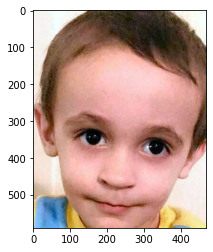

In [4]:
img=cv2.imread("/kaggle/input/autism-image-data/AutismDataset/consolidated/Autistic/0001.jpg")
sample=cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
imgplot = plt.imshow(sample)
plt.show()

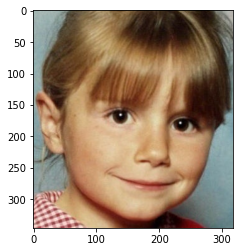

In [5]:
sample2=[]
def sampledata():
    for i in training_data[0:1]:
        img=cv2.imread(i)
        sample=cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
        imgplot = plt.imshow(sample)
        plt.show()
        sample2.append(sample)
    return sample2
sample_data=sampledata()


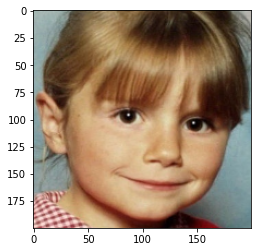

In [6]:
def ReSize(samdata):
    img=cv2.resize(samdata,(200,200))
    imgplot = plt.imshow(img)
    plt.show()
for i in sample_data:
    ReSize(i)
    

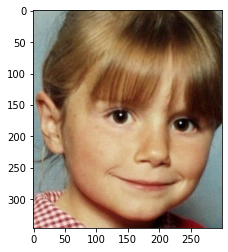

In [7]:
x=0
y=0
h=300
w=510
def cropping(samdata):
    img=samdata[x:w,y:h]
    imgplot = plt.imshow(img)
    plt.show()
for i in sample_data:
    cropping(i)   
    

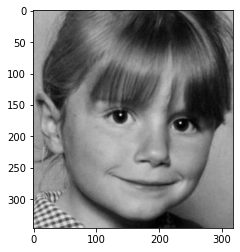

In [8]:
def gray(samdata):
    img=cv2.cvtColor(samdata, cv2.COLOR_BGR2GRAY)
    I=cv2.cvtColor(img,cv2.COLOR_BGR2RGB)
    imgplot = plt.imshow(I)
    plt.show()
for i in sample_data:
    gray(i)   
    

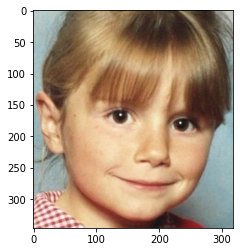

In [9]:
def Brightnessandcontrast(samdata):
    Bright = 20
    Contrast = 1
    img=cv2.cvtColor(samdata,cv2.COLOR_BGR2RGB)
    adjusted = cv2.convertScaleAbs(img, alpha=Contrast, beta=Bright)
    rgbadjusted=cv2.cvtColor(adjusted,cv2.COLOR_BGR2RGB)
    imgplot = plt.imshow(rgbadjusted)
    plt.show()
for i in sample_data:
    Brightnessandcontrast(i)

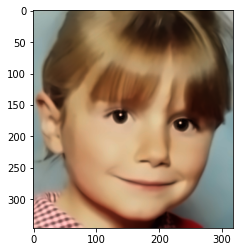

In [10]:
def noise_reduction(samdata):
    img=cv2.cvtColor(samdata,cv2.COLOR_BGR2RGB)
    filteredimg = cv2.fastNlMeansDenoisingColored(img,None,10,10,7,21)
    rgbfilteredimg=cv2.cvtColor(filteredimg,cv2.COLOR_BGR2RGB)
    imgplot = plt.imshow(rgbfilteredimg)
    plt.show()
for i in sample_data:
    noise_reduction(i)
    

found 1 face(s)


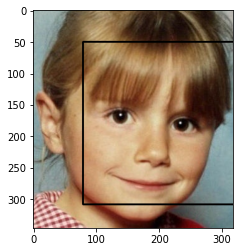

In [11]:
detectedimages=[]
def detect(samdata): 
    detector = dlib.get_frontal_face_detector()
    greyimg=cv2.cvtColor(samdata, cv2.COLOR_BGR2GRAY)
    detectedimg = detector(greyimg)
    print("found {} face(s)".format(len(detectedimg)))
    for face in detectedimg:
        x1 = face.left()
        y1 = face.top()
        x2 = face.right()
        y2 = face.bottom()
#start point,end point,color of box,thickness of box
        cv2.rectangle(samdata, (x1, y1), (x2, y2), (0, 0, 0), 2)
    imgplot = plt.imshow(samdata)
    plt.show()
    detectedimages.append(samdata)
    return detectedimages
for i in sample_data:
    detect(i)